In [5]:
import sys
import numpy as np
import pandas as pd
import os
sys.path.append('..')
import rbf_functions

In [6]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

In [19]:
output_dir = os.path.abspath('../notebooks/refsets/')
name = 'original_rbf'
filename = f'{name}_refset_variables.csv'
filename2 = f'{name}_refset.csv'
df_dvars = pd.read_csv(f"{output_dir}/{filename}",header=None)
df_refset = pd.read_csv(f"{output_dir}/{filename2}")

In [20]:
df_dvars

0         1         2         3         4         5
0   0.227925  0.380501 -0.597801  0.055146  0.502600  0.668106
1   0.307506  0.377857 -0.842531  0.055625  0.424453  0.727636
2   0.192705  0.426946  0.462243  0.849829  0.457432  0.035938
3   0.067695  0.553440 -0.337035  0.767238  0.772581  0.757852
4  -0.049942  0.241148  0.839252  0.077526  0.209300  0.427012
5  -0.049942  0.240702  0.839252  0.077532  0.222147  0.492001
6  -0.093814  0.240998  0.837011  0.080180  0.186199  0.686208
7  -0.091445  0.240844  0.894363  0.079828  0.191095  0.577998
8  -0.050450  0.239561  0.790171  0.079469  0.176697  0.411480
9  -0.030088  0.240205  0.701442  0.075792  0.048383  0.788796
10  0.241194  0.087386  0.054098  0.588119  0.102117  0.390919
11  0.233867  0.001661  0.065162  0.648018  0.996055  0.393429
12  0.230128  0.412473  0.040542  0.696741  0.107011  0.560575
13  0.235430  0.416336  0.040900  0.748272  0.112642  0.814888
14  0.235431  0.432242  0.043879  0.748272  0.151873  0.817994
15  0.240945  0.388357  0.043850  0.638671  0.089971  0.836429
16  0.240949  0.408925  0.053833  0.730311  0.107132  0.436738
17  0.240937  0.074771  0.043721  0.637048  0.111538  0.841298
18  0.497947  0.241006  0.842465  0.080443  0.252969  0.398913
19  0.240539  0.014061  0.078437  0.605811  0.490764  0.193606
20  0.273091  0.240374  0.881808  0.061269  0.613158  0.494684
21  0.078509  0.239990  0.585070  0.062483  0.596773  0.340248
22  0.291518  0.240606 -0.536847  0.059716  0.512544  0.462062
23  0.077530  0.239236  0.564686  0.062225  0.760438  0.405304
24  0.092608  0.238809  0.479430  0.062099  0.694811  0.412447
25  0.048345  0.240380  0.990483  0.061957  0.669647  0.538935
26  0.413989  0.238607  0.692797  0.062232  0.594030  0.339725
27 -0.053568  0.240014  0.934677  0.069964  0.345837  0.367401
28  0.257823  0.446226  0.057608  0.702173  0.291660  0.586552
29  0.255780  0.431470  0.054600  0.708826  0.252457  0.833987
30  0.258219  0.446233  0.057320  0.735088  0.376756  0.848855
31  0.239815  0.011155  0.059600  0.830806  0.401355  0.905136

In [12]:
columnname = ["c1","r1","c2","r2","w1","w2"]
df_dvars.columns = columnname
df_dvars.describe()

c1         r1         c2         r2         w1         w2
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000
mean    0.165662   0.278516   0.303578   0.368710   0.369451   0.556036
std     0.150833   0.139741   0.492216   0.328872   0.246535   0.216800
min    -0.093814   0.001661  -0.842531   0.055146   0.048383   0.035938
25%     0.062858   0.239480   0.043871   0.062420   0.170491   0.403706
50%     0.234649   0.240773   0.071799   0.080312   0.318748   0.516810
75%     0.244841   0.409812   0.801881   0.703837   0.532916   0.765588
max     0.497947   0.553440   0.990483   0.849829   0.996055   0.905136

In [28]:
# setup the RBF network
n_inputs = 1  # (time, storage of Conowingo)
n_outputs = 1 # Atomic, Baltimore, Chester, Downstream:- (hydropower, environmental)
n_rbfs = n_inputs+1


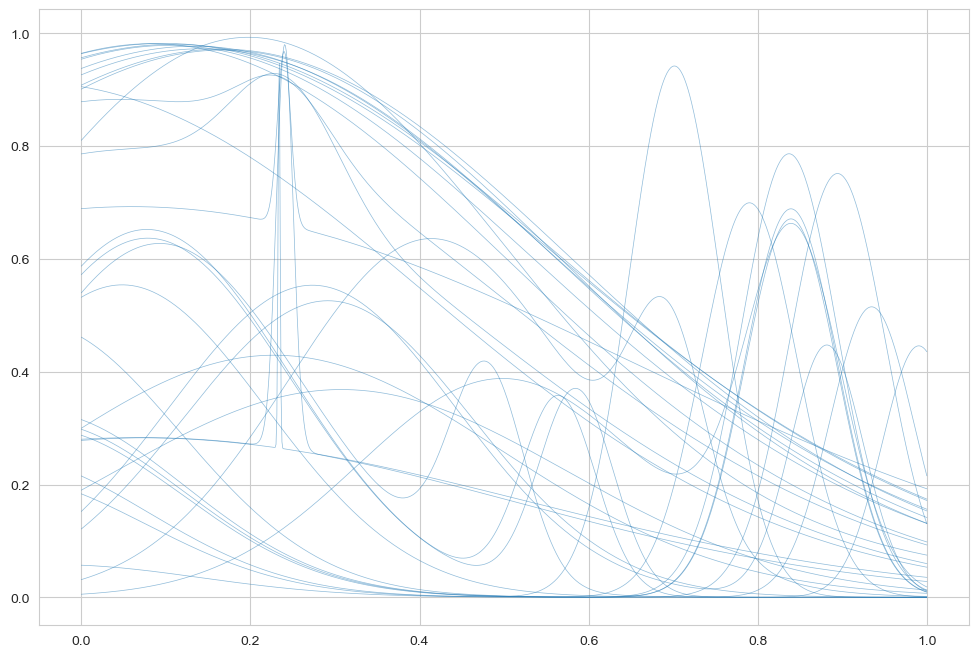

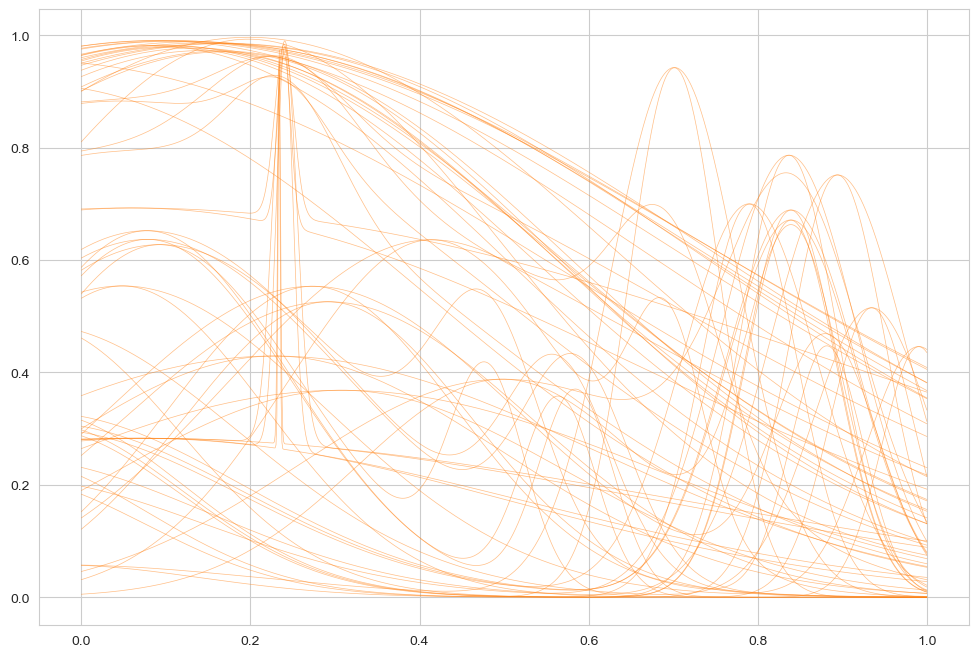

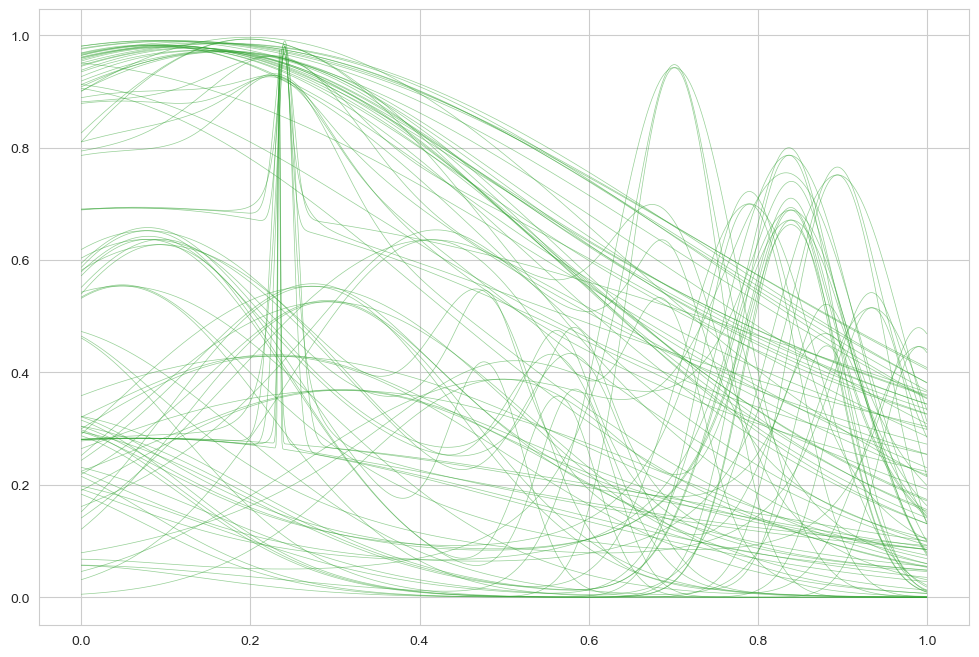

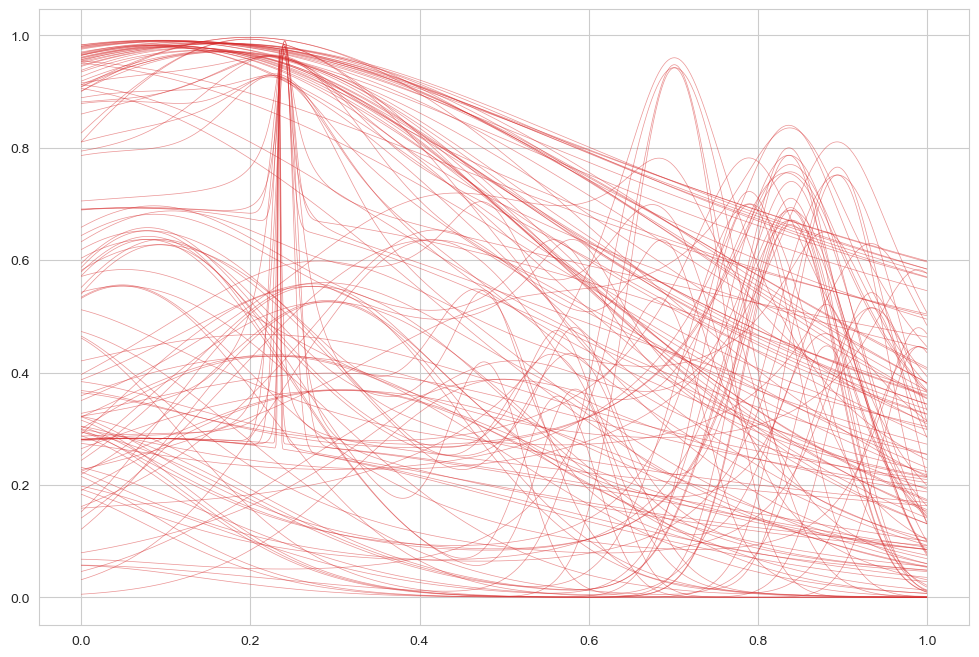

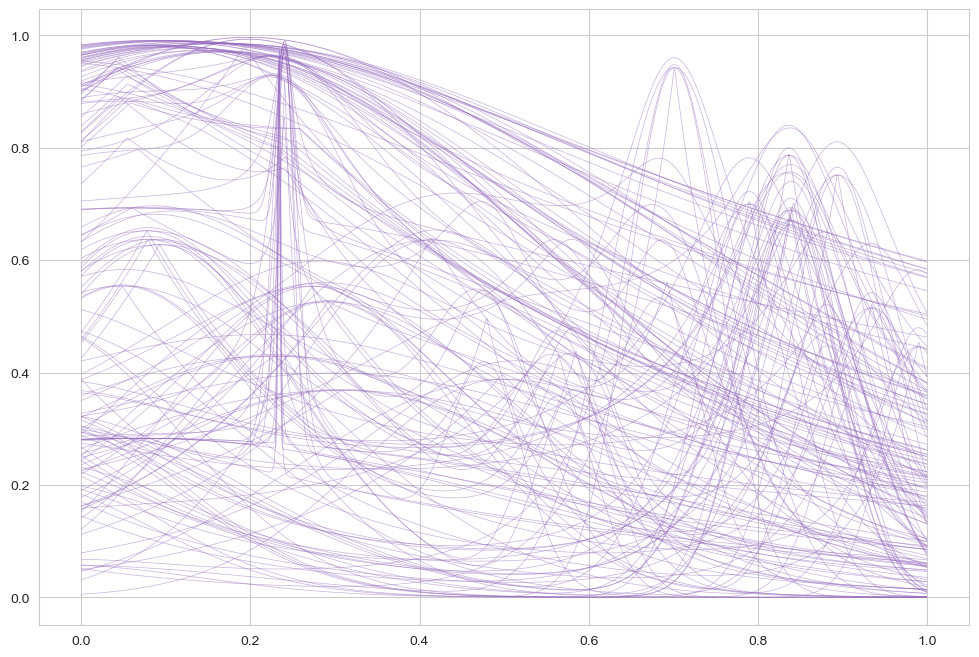

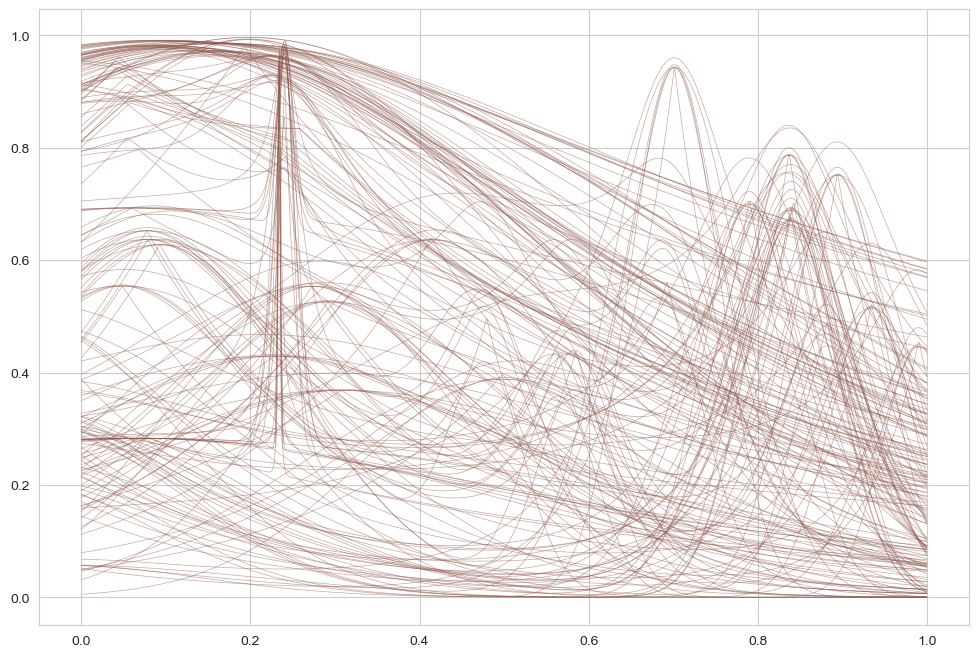

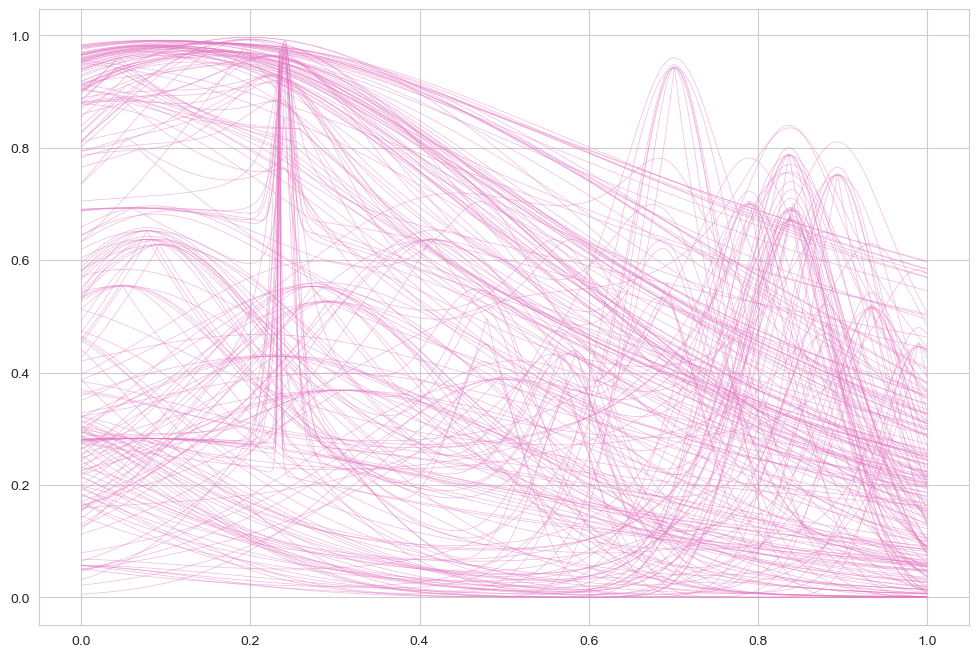

In [52]:
x = np.linspace(0, 1, 1000)
y = []

for entry, c in zip(rbfs, sns.color_palette()):
    rbf = rbf_functions.RBF(n_rbfs, n_inputs, n_outputs, rbf_function=entry)
    for _, row in df_dvars.iterrows():
        rbf.set_decision_vars(row.values)
        yi = [rbf.apply_rbfs(np.asarray([xi,]))[0] for xi in x]
        y.append(yi)

    fig, ax = plt.subplots()

    ax.plot(x,np.asarray(y).T, c=c, lw=0.5, alpha=0.5)
    plt.show()    

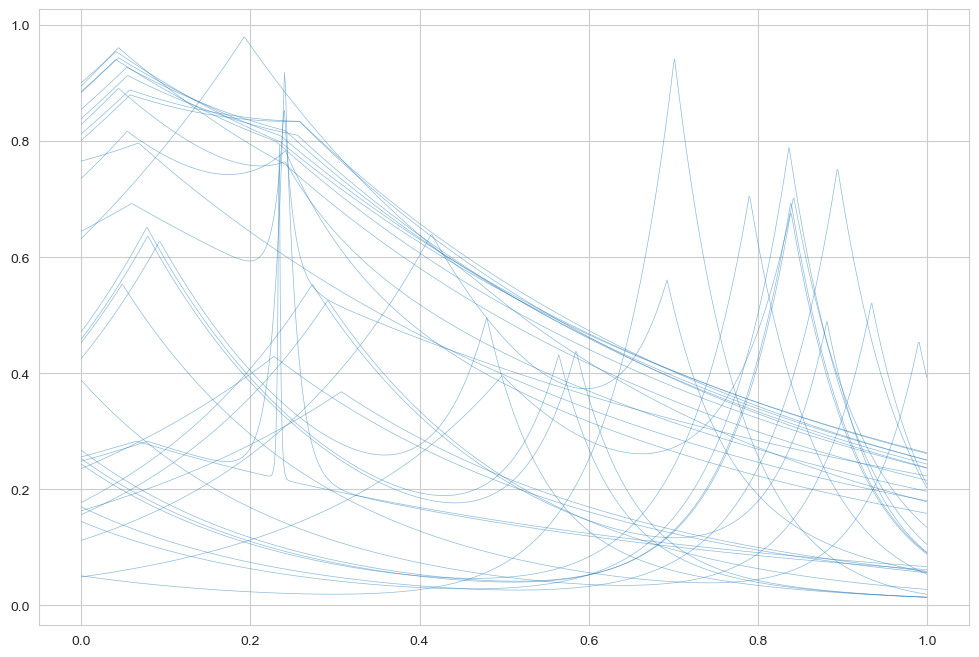